<a href="https://colab.research.google.com/github/bajitkumar/fastai_in_colab/blob/master/Lesson1_fastai_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/{accelerator}/torch_nightly.html
  
import torch
!pip install torchvision
!pip install fastai

!pip install Pillow==4.1.1
!pip install image

import fastai
from fastai import *
from fastai.vision import *

In [2]:
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

1.0.0.dev20181102
True
True


In [3]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_18.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_53.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_182.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_150.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_8.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=10)
data.normalize(imagenet_stats)

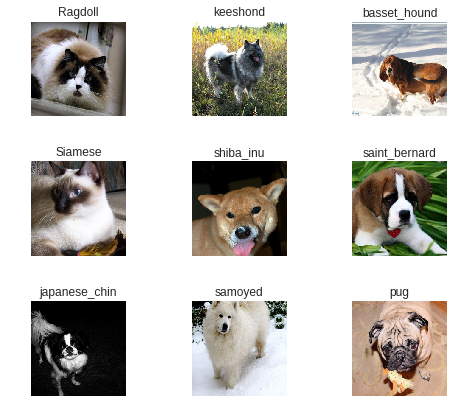

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
print(data.classes)
len(data.classes),data.c

['miniature_pinscher', 'wheaten_terrier', 'Maine_Coon', 'american_pit_bull_terrier', 'english_setter', 'german_shorthaired', 'Egyptian_Mau', 'great_pyrenees', 'Persian', 'japanese_chin', 'Bengal', 'Siamese', 'Abyssinian', 'keeshond', 'shiba_inu', 'saint_bernard', 'basset_hound', 'boxer', 'samoyed', 'newfoundland', 'staffordshire_bull_terrier', 'pomeranian', 'British_Shorthair', 'pug', 'leonberger', 'Russian_Blue', 'Ragdoll', 'Sphynx', 'yorkshire_terrier', 'Birman', 'havanese', 'beagle', 'Bombay', 'scottish_terrier', 'chihuahua', 'english_cocker_spaniel', 'american_bulldog']


(37, 37)

In [11]:
#learn = ConvLearner(data, models.resnet34, metrics=error_rate) # Doesn't work on the latest version of fastai
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 70428447.89it/s]


In [12]:
learn.fit_one_cycle(1)

Total time: 02:13
epoch  train_loss  valid_loss  error_rate
1      0.718169    0.292474    0.089820    (02:13)



In [0]:
interp = ClassificationInterpretation.from_learner(learn)

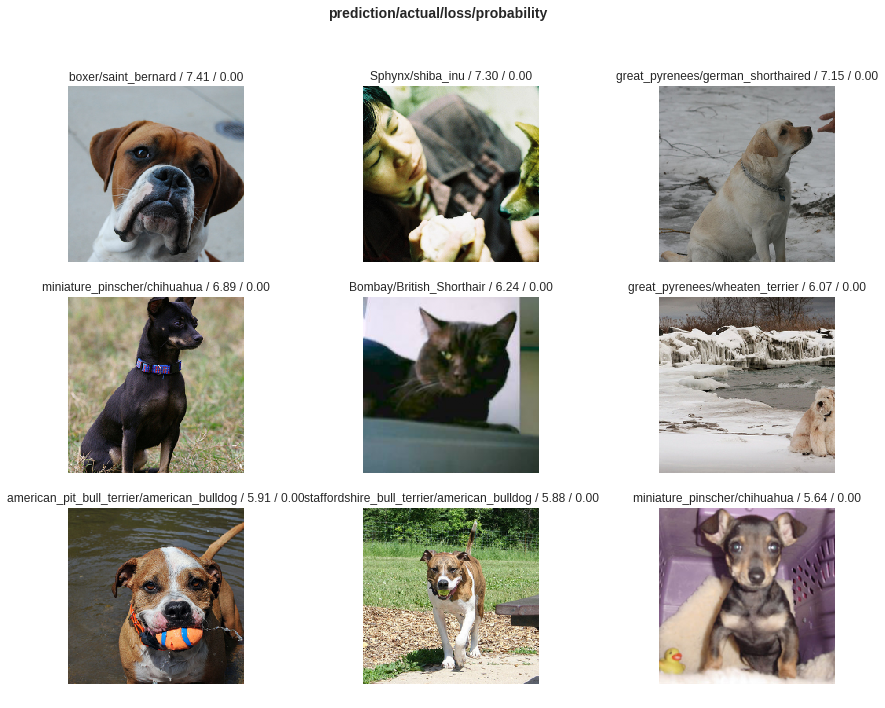

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

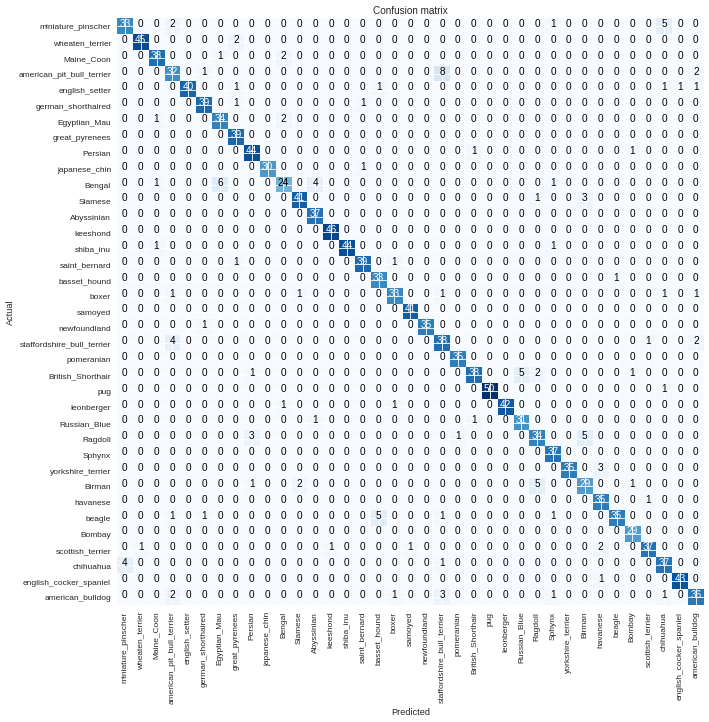

In [16]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [17]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Bengal', 'Egyptian_Mau', 6),
 ('miniature_pinscher', 'chihuahua', 5),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('Ragdoll', 'Birman', 5),
 ('Birman', 'Ragdoll', 5),
 ('beagle', 'basset_hound', 5),
 ('Bengal', 'Abyssinian', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Siamese', 'Birman', 3),
 ('Ragdoll', 'Persian', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3)]